Connected to kms-env (Python 3.9.12)

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import networkx as nx
from mixed_connectome import *

In [5]:
def indeg(graph, node):
    '''Returns the indegree of a node in a directed graph'''
    indegree = graph.in_degree(node)
    if isinstance(indegree, int):
        return indegree
    else:
        return 0

In [3]:
print(bc)

4.295757002698898


In [2]:
neurons = list(G.nodes)
pos = neuron_positions
synapses = list(G.edges)

#### Plotting structural and functional connectomes: locomotion circuit highlighted

In [4]:
# Structural network
struc_fname = f'./results/data/struc_connectivity/all_structural_connectivity.csv'

struc_con_f = open(struc_fname, 'r', newline='')
struc_con_rows = [line.strip().split(',') for line in struc_con_f.readlines()[2:]]

struc_edges = []
weighted_struc_edges = []

for line in struc_con_rows:
    struc_edges += [(str(line[0]), str(line[1])),]
    weighted_struc_edges += [(str(line[0]), str(line[1]), float(line[2])),]


In [21]:
# # Generate weighted structural connectivity matrix
nodes = sorted(neurons)
N = len(nodes)
C = np.zeros((N,N))

for i in range(N):
    n1 = str(nodes[i])
    for j in range(N):
        n2 = str(nodes[j])
        
        if (n1, n2) in struc_edges:
            we = [w for w in weighted_struc_edges if (w[0] == n1) and (w[1] == n2)][0]
            C[i][j] = float(we[2])
        else:
            C[i][j] = 0.

In [6]:
print(C)

[[0.       0.02     0.       ... 0.       0.       0.      ]
 [0.021739 0.       0.       ... 0.       0.       0.      ]
 [0.014925 0.       0.       ... 0.       0.       0.      ]
 ...
 [0.       0.       0.       ... 0.       0.       0.      ]
 [0.       0.       0.       ... 0.       0.       0.019231]
 [0.       0.       0.       ... 0.       0.040816 0.      ]]


In [18]:
print(len(struc_edges))

4927


In [8]:
K = nx.DiGraph()

In [9]:
K.add_edges_from(struc_edges)

In [35]:
print(len(K.edges))

4927


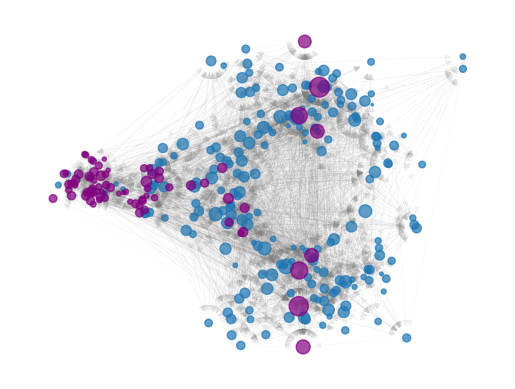

In [49]:
# plot strucrural connectome, with node size = indegree 
# options1 = {"node_size": 100, "alpha": 0.5}
# options2 = {"node_size": 100, "alpha": 0.9}
motors = [n for _, n in enumerate(motorNeurons)]
locomots = CIRCUITS['Locomotory']
others = [n for n in neurons if n not in locomots]
# motor_sizes = [3. + 10 * (K.in_degree(n)) for n in motors]

# nx.draw_networkx_nodes(K, pos, nodelist=['AVAL', 'AVAR'], node_size=[100, 200], node_color="tab:red", alpha=.5)
nx.draw_networkx_edges(K, pos, width=.2, edge_color="grey", alpha=0.1)
nx.draw_networkx_nodes(K, pos, nodelist=others, node_size=[[1. + 2 * indeg(K, n) for _,n in enumerate(others)]], node_color="tab:blue", alpha=.7)
nx.draw_networkx_nodes(K, pos, nodelist=locomots, node_size=[[1. + 2 * indeg(K, n) for _,n in enumerate(locomots)]], node_color="purple", alpha=.7)
plt.axis('off')
# plt.savefig(f'./results/interaction-networks/locomotion_circuit.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
## Plot structural connectome ith node size = indeg of functional connectome
b_factor = 2.5
func_fname = f'./results/data/kms_connectivity/all_kms_connectivity_{b_factor}xbeta_c_5000-iters.csv'
alph = .06
kms_conn_f = open(func_fname, 'r', newline='')

kms_con_rows = [line.strip().split(',') for line in kms_conn_f.readlines()[2:]]
# all_connects = [(str(l[0]), str(l[1]), float(l[2]), float(l[3])) for l in kms_con_rows]
kms_edges = []

for _, line in enumerate(kms_con_rows):
    # if (float(line[3]) <= alph):
    kms_edges += [(str(line[0]), str(line[1])),] 

In [15]:
kms_weighted_connections = []

for _, line in enumerate(kms_con_rows):
    # if (float(line[3]) <= alph):
    kms_weighted_connections += [(str(line[0]), str(line[1]), float(line[2])),] 

## Normalize weights
w_sum = nonzero_sum([e[2] for e in kms_weighted_connections])   

kms_weighted_connections = [(e[0], e[1], e[2] / w_sum) for e in kms_weighted_connections]

In [22]:
# Generate connectivity matrix
# nodes = sorted(neurons)
# N = len(nodes)
A = np.zeros((N,N))

for i in range(N):
    n1 = str(nodes[i])
    for j in range(N):
        n2 = str(nodes[j])
        
        if (n1, n2) in kms_edges:
            we = [w for w in kms_weighted_connections if (w[0] == n1) and (w[1] == n2)][0]
            A[i][j] = float(we[2])
        else:
            A[i][j] = 0.
# with open("./results/data/matrices/neuron_labels.txt'", "w") as f:
#     f.writelines([f'{n}\n' for _, n in enumerate(nodes)])

# A.tofile(f'./results/data/matrices/kms_matrix_{b_factor}xbeta_c_5000-iters.csv', sep=',')
            

In [24]:
## Generate the KMS matrix at structural temperature
bfactor = 2.5
_, W = kms_subgraph_adj_mat(G, bfactor * bc, nodelist=nodes)

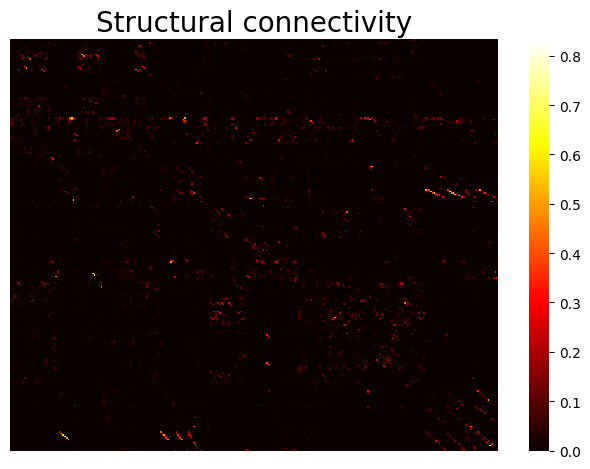

In [53]:
## Comparing structure and KMS state matrix
fig, ax = plt.subplots()
# ax1 = axs[0]
# ax2 = axs[1]
df1 = pd.DataFrame(C.T, index = nodes, columns=nodes)

sns.heatmap(df1, cmap='hot',linewidths=0.0, rasterized=True, ax=ax)
# sns.heatmap(df2, cmap='plasma', ax=ax)

ax.set_title(f'Structural connectivity', size=20)
# ax2.set_title(r"KMS matrix at $\beta$ =" + f'{round(bfactor*bc,4)}')
# fig.tight_layout()
# cbar = plt.colorbar(shrink=.2) 
# cbar.set_label("Weight", loc='center', size=12)
# cbar.ax.tick_params(labelsize=10)
plt.xticks(ticks=[], labels=[])
plt.yticks(ticks=[], labels=[])

# plt.yticks(rotation=0)
fig.tight_layout()
plt.savefig(f'./results/matrices/celegans-structure.pdf', dpi=300, bbox_inches='tight')
# plt.show()

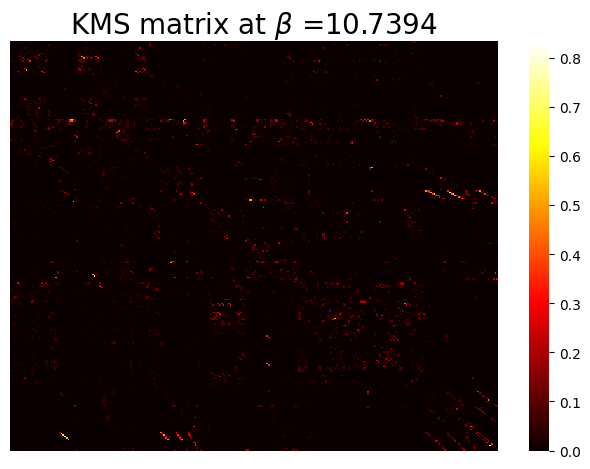

In [54]:
# sns.heatmap(df2, cmap='plasma', ax=ax)
fig, ax = plt.subplots()
df2 = pd.DataFrame(W, index = nodes, columns=nodes)
sns.heatmap(df2, cmap='hot', linewidths=0.0, rasterized=True, ax=ax)
ax.set_title(r"KMS matrix at $\beta$ =" + f'{round(bfactor*bc,4)}', size=20)
# fig.tight_layout()
# cbar = plt.colorbar(shrink=.2) 
# cbar.set_label("Weight", loc='center', size=12)
# cbar.ax.tick_params(labelsize=10)
plt.xticks(ticks=[], labels=[])
plt.yticks(ticks=[], labels=[])

# plt.yticks(rotation=0)
fig.tight_layout()
plt.savefig(f'./results/matrices/celegans-kms-beta-structural.pdf', dpi=300, bbox_inches='tight')

# plt.show()

In [ ]:
df = pd.DataFrame(A, index=nodes, columns=nodes)
# df.to_csv(f'./results/data/matrices/kms_matrix_{b_factor}xbeta_c_5000-iters.csv')

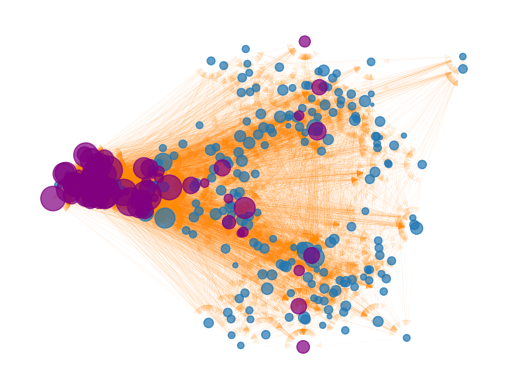

In [ ]:
F = nx.DiGraph()
F.add_edges_from(kms_edges)
nx.draw_networkx_edges(F, pos, width=.2, edge_color="darkorange", alpha=0.1)
nx.draw_networkx_nodes(F, pos, nodelist=others, node_size=[[1. + 2 * indeg(F, n) for _,n in enumerate(others)]], node_color="tab:blue", alpha=.7)
nx.draw_networkx_nodes(F, pos, nodelist=locomots, node_size=[[1. + 2 * indeg(F, n) for _, n in enumerate(locomots)]], node_color="purple", alpha=.7)
plt.axis('off')
# plt.savefig(f'./results/interaction-networks/func_connectome_locomotion_circuit.pdf', dpi=300, bbox_inches='tight')

plt.show()


#### Interaction profiles vs Randi's functional atlas

In [10]:
RANDI_SIMULS = {
    'FLPL': ['ADEL', 'IL1DR', 'VD02', 'AWAL', 'CEPDL', 'BAGR', 'BAGL', 'AWCR', 'AWCL', 'AWBR', 'AWBL', 'AWAR', 'AVKR', 'CEPVL', 'AVKL', 'IL1DL', 'AVJL', 'AVHR', 'AVHL', 'AVG', 'AVFR', 'CEPDR', 'CEPVR', 'AVER', 'DA01', 'IL2DL', 'IL1VR',  'IL1VL', 'IL1R', 'AVJR'],
    'RIAL': ['RIVR', 'IL1DL', 'AFDL', 'RIVL', 'AVEL', 'ASHL', 'AWBL', 'AIBL', 'RMDVL', 'AVDL', 'URXL', 'OLQDR', 'ASKR', 'RMDDR', 'SMDVL', 'SIBVR', 'SAAVL', 'ALA', 'ASJR', 'AVKL', 'AVL', 'AWAR', 'AVJR', 'BAGL'], 
    'AWCR': ['AVBR', 'RIBR', 'AWBL', 'ASEL', 'AVHL', 'ADLL', 'CEPVL', 'AVHR', 'AVJL', 'AVJR', 'AVKR', 'AWAR', 'AWBR', 'BAGL', 'CEPVR', 'CEPDR', 'VB02', 'AVER', 'DA01', 'DB01', 'FLPL', 'FLPR'],
    'AFDL': ['SMBVL', 'AWAR', 'AFDR', 'IL1DL', 'VB02', 'CEPVR', 'CEPVL', 'AWCR', 'AWCL', 'AWBR', 'AWAL', 'AWAL', 'DB01', 'AVKR', 'AVKL', 'AVJL', 'AVHR', 'AVHL', 'AVG', 'DA01', 'DB02', 'AVFL', 'IL2DR', 'IL2DL', 'IL1VR', 'IL1VL', 'IL1DR', 'AVJR']
}

In [144]:
sim_neuron = 'AWCR'
responsive_neurons = RANDI_SIMULS[sim_neuron]
outnghbs = [e[1] for e in struc_edges if e[0] == sim_neuron]
others = [n for n in neurons if (n not in responsive_neurons)]

In [11]:
def draw_stim_response(stim_neur):
    # draw simulated neuron and its responsive neurons
    responsive_neurons = RANDI_SIMULS[stim_neur]
    others = [n for n in neurons if (n not in responsive_neurons)]
    nx.draw_networkx_edges(K, pos, width=.1, edge_color="grey", alpha=0.1)

    # nx.draw_networkx_nodes(K, pos, nodelist=outnghbs, node_size=40, node_color="dodgerblue", alpha=.5)
    nx.draw_networkx_nodes(K, pos, nodelist=others, node_size=80, node_color="grey", alpha=.2)
    nx.draw_networkx_nodes(K, pos, nodelist=responsive_neurons, node_size=100, node_color="c", alpha=1.)
    nx.draw_networkx_nodes(K, pos, nodelist=[stim_neur], node_size=100, node_color="r", alpha=1.)

    plt.axis('off')
    # plt.savefig(f'./results/interaction-networks/{stim_neur}_responses.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

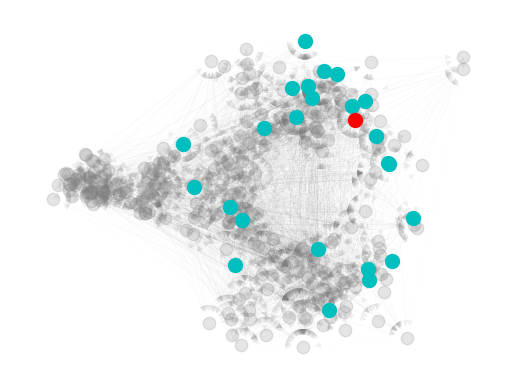

In [12]:
draw_stim_response('RIAL')

##### Interaction profiles

In [24]:
from connectome import get_interaction_profile
def draw_interaction_profile(source, b_factor):
    # Draw netowork representing pure kms state given by the source node
    nodes, node_profile = get_interaction_profile(G, source, b_factor * bc)
    prof_w = sorted([(nodes[i], node_profile[i]) for i in range(len(nodes)) if node_profile[i] > 1e-3], key=lambda x:  x[1], reverse=True)
    kms_targets = [x[0] for x in prof_w]
    
    # comparison against Randi's simulations
    kms_targets_responsive = [n for n in kms_targets if n in RANDI_SIMULS[source]]
    overlap = len(kms_targets_responsive) / len(RANDI_SIMULS[source])

    # outnghbs = [e[1] for e in struc_edges if e[0] == source]
    others = [n for n in neurons if (n not in kms_targets)]
    print(f'{overlap * 100}%')

    nx.draw_networkx_edges(K, pos, width=.1, edge_color="grey", alpha=0.1)

    # nx.draw_networkx_nodes(K, pos, nodelist=outnghbs, node_size=40, node_color="dodgerblue", alpha=.5)
    nx.draw_networkx_nodes(K, pos, nodelist=others, node_size=80, node_color="grey", alpha=.2)
    nx.draw_networkx_nodes(K, pos, nodelist=[n for n in kms_targets if n not in RANDI_SIMULS[source]], node_size=100, node_color="tab:green", alpha=.4)
    nx.draw_networkx_nodes(K, pos, nodelist=kms_targets_responsive, node_size=100, node_color="c", alpha=1.)
    nx.draw_networkx_nodes(K, pos, nodelist=[source], node_size=100, node_color="r", alpha=1.)

    plt.axis('off')
    # plt.savefig(f'./results/interaction-networks/{source}_interaction_profile-{b_factor*bc}.pdf', dpi=300, bbox_inches='tight')

    plt.show()
    plt.close()




In [25]:
source = 'RIAL'

58.333333333333336%


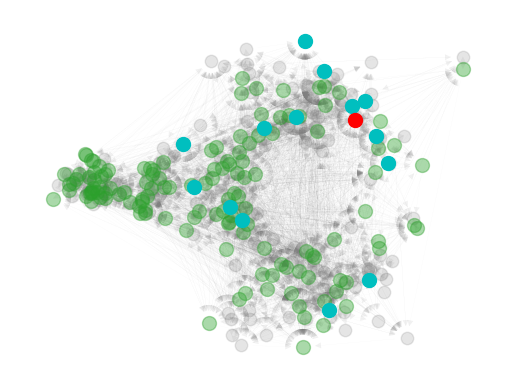

In [26]:
b_factor = 1.07
draw_interaction_profile(source, b_factor)

58.333333333333336%


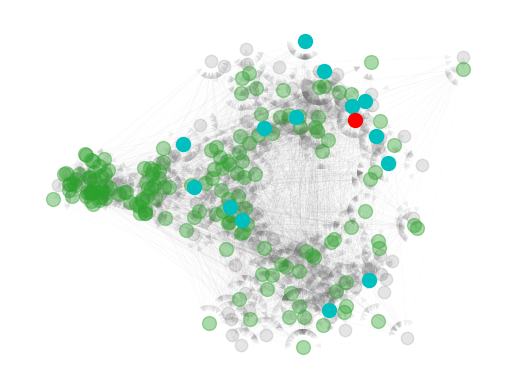

In [27]:
b_factor = 1.01
draw_interaction_profile(source, b_factor)

41.66666666666667%


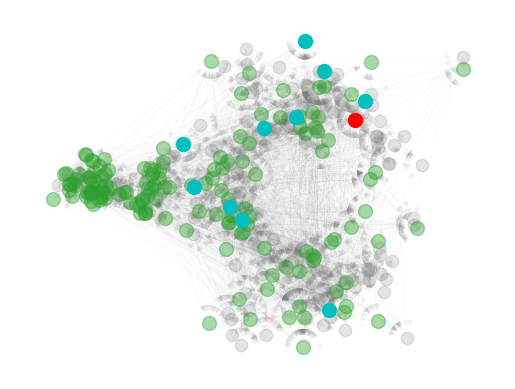

In [28]:
b_factor = 1.0001
draw_interaction_profile(source, b_factor)

45.83333333333333%


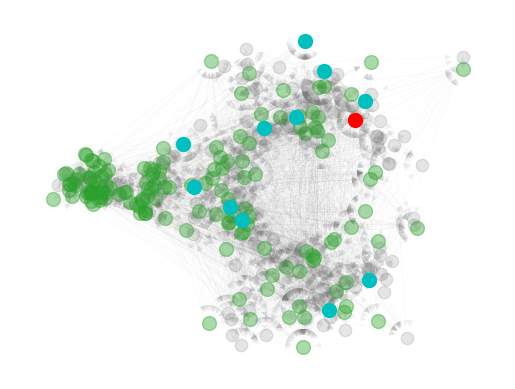

In [29]:
b_factor = 1.001
draw_interaction_profile(source, b_factor)

In [83]:
b_factor = 1.009
draw_interaction_profile(source, b_factor)

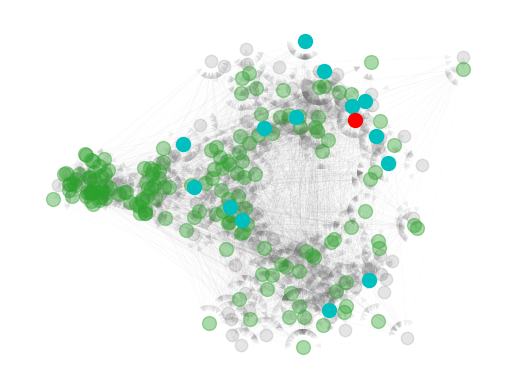

In [19]:
b_factor = 1.01
draw_interaction_profile(source, b_factor)

58.333333333333336%


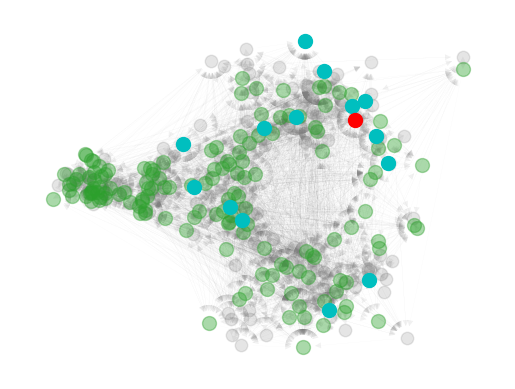

In [30]:
b_factor = 1.05
draw_interaction_profile(source, b_factor)

54.166666666666664%


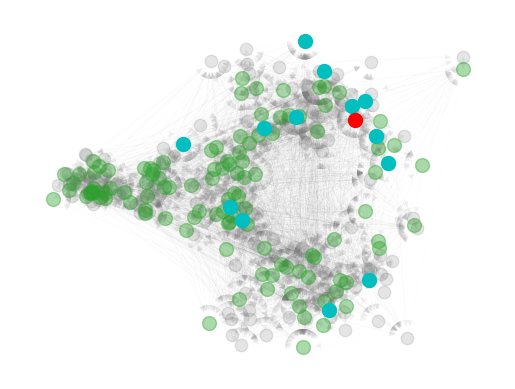

In [31]:
b_factor = 1.1
draw_interaction_profile(source, b_factor)

In [89]:
b_factor = 1.7
draw_interaction_profile(source, b_factor)

68.18181818181817%


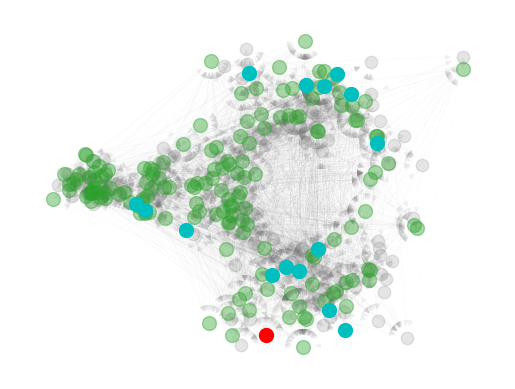

In [39]:
source = 'AWCR'
b_factor = 1.05
draw_interaction_profile(source, b_factor)

In [34]:
b_factor = 2.5
draw_interaction_profile(source, b_factor)

3.571428571428571%


KeyboardInterrupt: 

In [ ]:
b_factor = 2.5
draw_interaction_profile(source, b_factor)

In [ ]:
print(1.02 * bc)

4.381672142752876


In [ ]:
print(1.05 * bc)

4.510544852833843


In [ ]:
print(1.07 * bc)

4.596459992887821


In [ ]:
print(1 / (1.07 * bc))

0.21755873031579012
